# Pneumonia Project


![Pneumonia](neumonia_image.jpg.jpg)

## What is Pneumonia?

Pneumonia is a serious respiratory infection that affects the lungs, causing inflammation in one or both lungs. The infection leads to the filling of the air sacs (alveoli) with fluid or pus, making it difficult for the lungs to function properly. This condition can range from mild to severe and may be life-threatening, particularly in young children, the elderly, and those with weakened immune systems or chronic health conditions.

### Symptoms

Symptoms of pneumonia can vary based on the cause and severity but generally include:

- **Cough:** Often persistent and may produce mucus or phlegm that can be green, yellow, or blood-stained.
- **Fever:** Typically high, sometimes accompanied by chills and sweating.
- **Shortness of Breath:** Difficulty breathing or rapid, shallow breathing.
- **Chest Pain:** Sharp or stabbing pain that worsens with deep breathing or coughing.
- **Fatigue:** Feeling unusually tired or weak.
- **Confusion:** Particularly in older adults, pneumonia can lead to confusion or changes in mental status.

### Causes of Pneumonia

Pneumonia can be caused by a variety of pathogens, including:

1. **Bacteria:**
   - **Streptococcus pneumoniae:** This is the most common bacterial cause of pneumonia in adults.
   - **Haemophilus influenzae:** Another common bacterial cause, particularly in people with chronic lung conditions.
   - **Mycoplasma pneumoniae:** This type often causes atypical pneumonia, which may have milder symptoms and is common in younger people.

2. **Viruses:**
   - **Influenza Virus:** The flu virus can lead to viral pneumonia, particularly during flu season.
   - **Respiratory Syncytial Virus (RSV):** Commonly affects infants and young children, causing bronchiolitis or pneumonia.
   - **Coronavirus (COVID-19):** SARS-CoV-2, the virus responsible for COVID-19, can cause severe pneumonia and has been a major global health concern.

3. **Fungi:**
   - **Histoplasma capsulatum:** Found in soil contaminated with bird or bat droppings.
   - **Coccidioides immitis:** Common in arid regions and causes Valley Fever.
   - **Cryptococcus neoformans:** Can affect individuals with weakened immune systems, such as those with HIV/AIDS.

4. **Other Agents:**
   - **Aspiration Pneumonia:** Caused by inhaling food, liquid, or vomit into the lungs, which can introduce bacteria from the mouth or throat.


### Diagnosis

Diagnosing pneumonia typically involves:

1. **Medical History and Physical Examination:**
   - The doctor will inquire about symptoms, recent illnesses, and any potential exposures.

2. **Chest X-Ray:**
   - An X-ray can help visualize the extent of the infection and differentiate between pneumonia and other conditions.

3. **Blood Tests:**
   - To identify signs of infection and determine the underlying cause.

4. **Sputum Test:**
   - Analyzing mucus from the lungs to identify the causative pathogen.

5. **Pulse Oximetry:**
   - Measures the oxygen level in the blood to assess how well the lungs are functioning.

### Treatment

Treatment depends on the cause and severity of pneumonia and may include:

1. **Antibiotics:**
   - Prescribed for bacterial pneumonia; the choice of antibiotic depends on the type of bacteria.

2. **Antiviral Medications:**
   - Used for viral pneumonia caused by specific viruses like influenza.

3. **Antifungal Medications:**
   - Required for fungal pneumonia.

4. **Supportive Care:**
   - Includes rest, fluids, pain relievers, and medications to reduce fever.

5. **Hospitalization:**
   - Severe cases may require hospitalization for intravenous antibiotics, oxygen therapy, and other supportive measures.


### Additional Information:
For more details, consult a medical professional or refer to authoritative health resources.


In [1]:
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import fnmatch

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'chest_xray/'

# define paths
train_normal_dir = path + 'train/NORMAL/'
train_pneu_dir = path + 'train/PNEUMONIA/'

test_normal_dir = path + 'test/NORMAL/'
test_pneu_dir = path + 'test/PNEUMONIA/'

val_normal_dir = path + 'val/NORMAL/'
val_pneu_dir = path + 'val/PNEUMONIA/'

# Function to find files with a given pattern in a directory
def find_files(directory, pattern):
    return [os.path.join(directory, f) for f in os.listdir(directory) if fnmatch.fnmatch(f, pattern)]

# find all files, our files have extension jpeg
train_normal_cases = find_files(train_normal_dir, '*jpeg')
train_pneu_cases = find_files(train_pneu_dir, '*jpeg')

test_normal_cases = find_files(test_normal_dir, '*jpeg')
test_pneu_cases = find_files(test_pneu_dir, '*jpeg')

val_normal_cases = find_files(val_normal_dir, '*jpeg')
val_pneu_cases = find_files(val_pneu_dir, '*jpeg')

# make path using / instead of \ ... this may be redundant step
train_normal_cases = [x.replace('\\', '/') for x in train_normal_cases]
train_pneu_cases = [x.replace('\\', '/') for x in train_pneu_cases]
test_normal_cases = [x.replace('\\', '/') for x in test_normal_cases]
test_pneu_cases = [x.replace('\\', '/') for x in test_pneu_cases]
val_normal_cases = [x.replace('\\', '/') for x in val_normal_cases]
val_pneu_cases = [x.replace('\\', '/') for x in val_pneu_cases]
# create lists for train, test & validation cases, create labels as well
train_list = []
test_list = []
val_list = []

for x in train_normal_cases:
    train_list.append([x, 0])
    
for x in train_pneu_cases:
    train_list.append([x, 1])
    
for x in test_normal_cases:
    test_list.append([x, 0])
    
for x in test_pneu_cases:
    test_list.append([x, 1])
    
for x in val_normal_cases:
    val_list.append([x, 0])
    
for x in val_pneu_cases:
    val_list.append([x, 1])


# shuffle/randomize data as they were loaded in order: normal cases, then pneumonia cases
rn.shuffle(train_list)
rn.shuffle(test_list)
rn.shuffle(val_list)


# create dataframes
train_df = pd.DataFrame(train_list, columns=['image', 'label'])
test_df = pd.DataFrame(test_list, columns=['image', 'label'])
val_df = pd.DataFrame(val_list, columns=['image', 'label'])



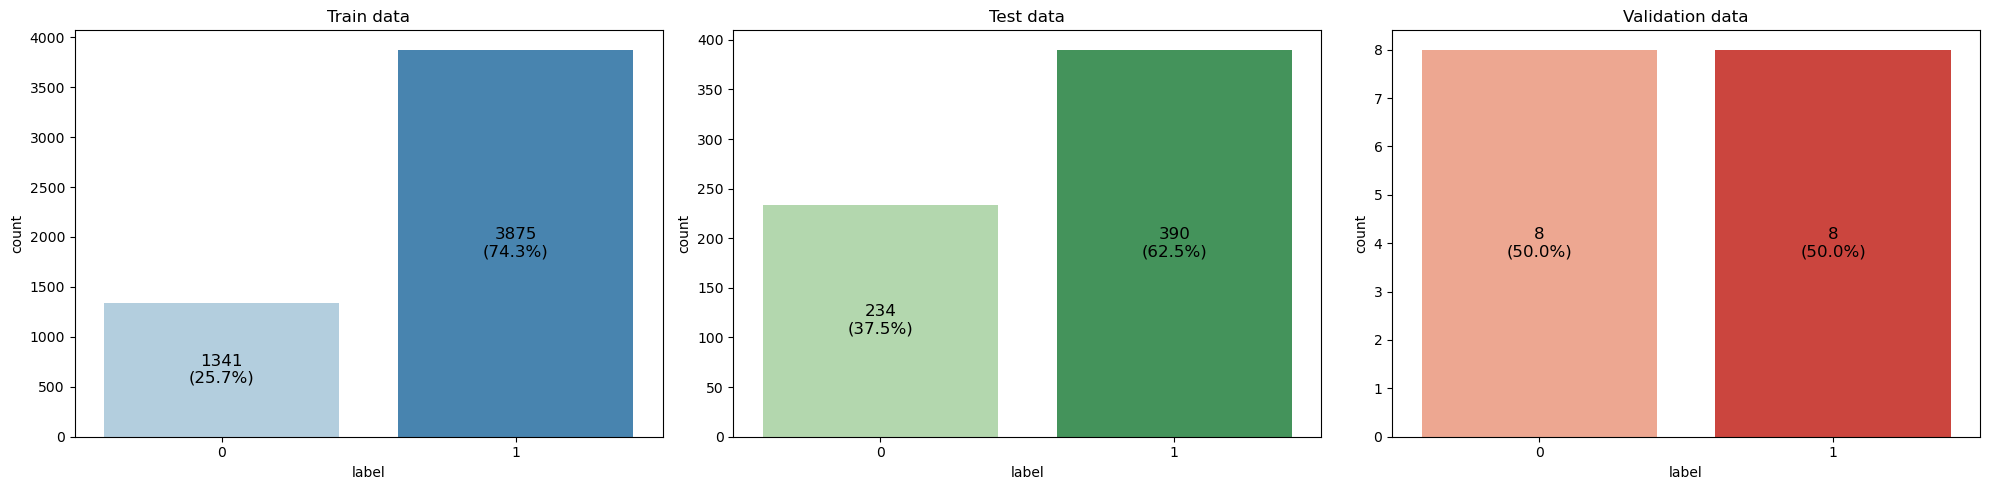

In [3]:
def annotate_plot(ax, data):
    # Get the counts and total
    counts = data['label'].value_counts()
    total = counts.sum()
    
    # Annotate each bar
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = height / 2  # Position text in the middle of the bar
        
        # Count and percentage
        count = int(height)
        percentage = height / total * 100
        
        # Add text to the plot
        ax.text(x, y, f'{count}\n({percentage:.1f}%)', ha='center', va='center', fontsize=12, color='Black')

plt.figure(figsize=(20, 5))

# Train data
plt.subplot(1, 3, 1)
ax1 = sns.countplot(x='label', data=train_df, palette='Blues')
plt.title('Train data')
annotate_plot(ax1, train_df)

# Test data
plt.subplot(1, 3, 2)
ax2 = sns.countplot(x='label', data=test_df, palette='Greens')
plt.title('Test data')
annotate_plot(ax2, test_df)

# Validation data
plt.subplot(1, 3, 3)
ax3 = sns.countplot(x='label', data=val_df, palette='Reds')
plt.title('Validation data')
annotate_plot(ax3, val_df)

plt.tight_layout()
plt.show()

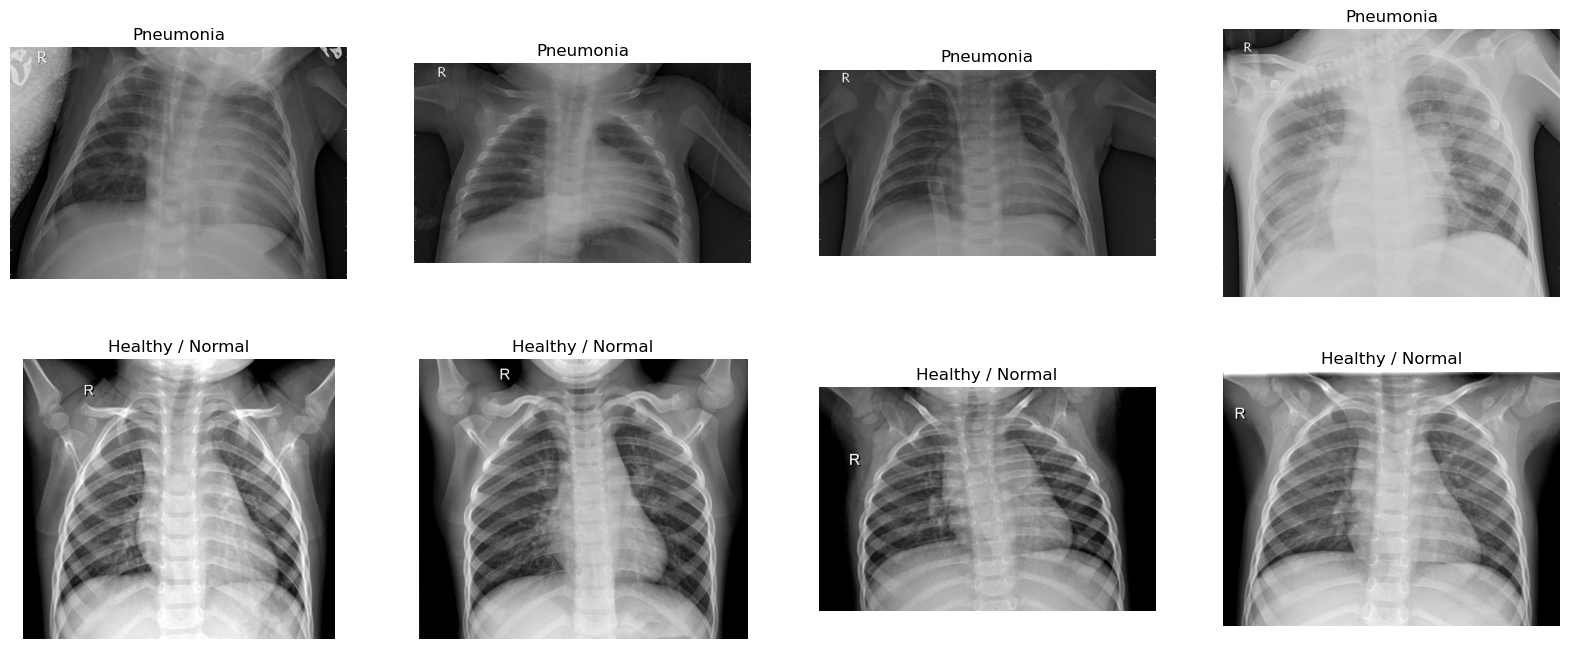

In [4]:
plt.figure(figsize=(20,8))
for i,img_path in enumerate(train_df[train_df['label'] == 1][0:4]['image']):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Pneumonia')
    
for i,img_path in enumerate(train_df[train_df['label'] == 0][0:4]['image']):
    plt.subplot(2,4,4+i+1)
    plt.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title('Healthy / Normal')

In [5]:
def process_data(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (196, 196))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (196,196,1))
    
    return img

def compose_dataset(df):
    data = []
    labels = []

    for img_path, label in df.values:
        data.append(process_data(img_path))
        labels.append(label)
        
    return np.array(data), np.array(labels)

In [6]:
X_train, y_train = compose_dataset(train_df)
X_test, y_test = compose_dataset(test_df)
X_val, y_val = compose_dataset(val_df)

print('Train data shape: {}, Labels shape: {}'.format(X_train.shape, y_train.shape))
print('Test data shape: {}, Labels shape: {}'.format(X_test.shape, y_test.shape))
print('Validation data shape: {}, Labels shape: {}'.format(X_val.shape, y_val.shape))

Train data shape: (5216, 196, 196, 1), Labels shape: (5216,)
Test data shape: (624, 196, 196, 1), Labels shape: (624,)
Validation data shape: (16, 196, 196, 1), Labels shape: (16,)


In [7]:
# define generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

# fit generator on our train features
datagen.fit(X_train)

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Create the model
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(196, 196, 1)))
model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# Configure the optimizer
optimizer = Adam(learning_rate=0.0001, decay=1e-5)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Set up the early stopping callback
callback = EarlyStopping(monitor='loss', patience=6)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=4),
                    validation_data=(X_test, y_test),
                    epochs=100, verbose=1,
                    callbacks=[callback],
                    class_weight={0:6.0, 1:0.5})


Epoch 1/100
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.3540 - loss: 0.8912 - val_accuracy: 0.6843 - val_loss: 0.6706
Epoch 2/100
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.7881 - loss: 0.3969 - val_accuracy: 0.8606 - val_loss: 0.3700
Epoch 3/100
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.8188 - loss: 0.3448 - val_accuracy: 0.8670 - val_loss: 0.3431
Epoch 4/100
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.8466 - loss: 0.2739 - val_accuracy: 0.8846 - val_loss: 0.2929
Epoch 5/100
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.8588 - loss: 0.2691 - val_accuracy: 0.8734 - val_loss: 0.2880
Epoch 6/100
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.8764 - loss: 0.2474 - val_accuracy: 0.8990 - val_loss: 0.2621
Epoch 7/100
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.8878 - loss: 0.2345 - val_accuracy: 0.9087 - val_loss: 0.2578
Epoch 8/100
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 

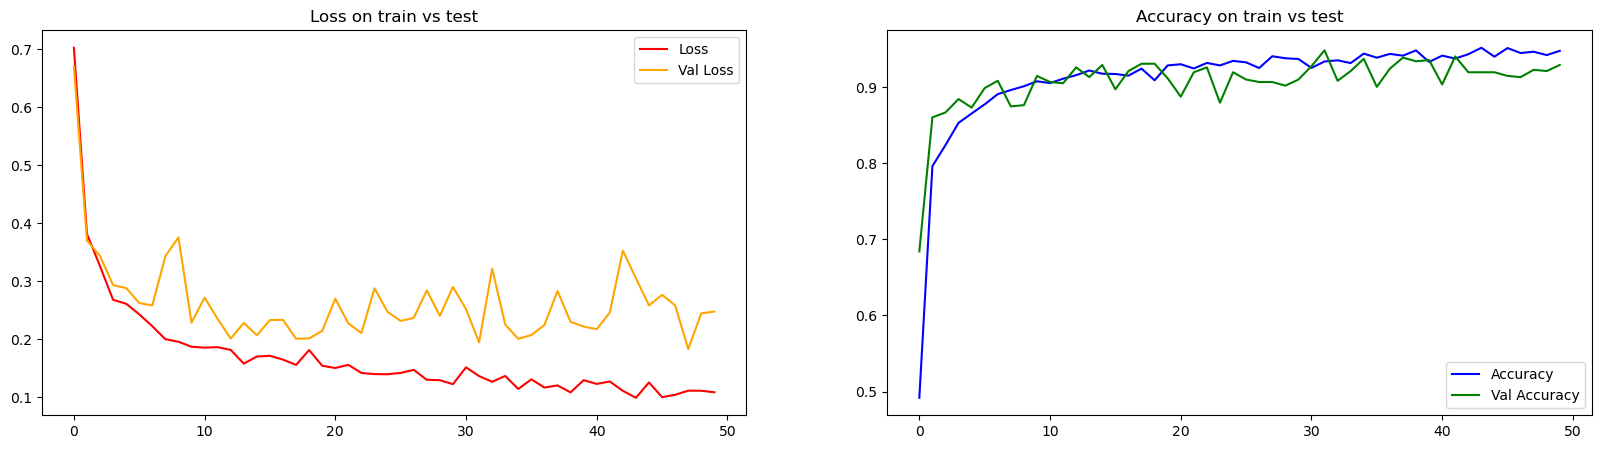

In [11]:
plt.figure(figsize=(20,5))

# plot loss & val loss
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='red', label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', label='Val Loss')
plt.title('Loss on train vs test')
plt.legend(loc='best')

# plot accuracy and val accuracy
plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='blue', label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Val Accuracy')
plt.title('Accuracy on train vs test')
plt.legend(loc='best')

plt.show()


## Loss on Train vs Test:
### Description: Shows the training loss and validation loss over epochs.
### Observations:
- The training loss (red line) decreases steadily, indicating the model is learning.
- The validation loss (orange line) also decreases but shows more fluctuations, indicating varying performance on the validation set.
## Accuracy on Train vs Test:
### Description: Shows the training accuracy and validation accuracy over epochs.
### Observations:
- The training accuracy (blue line) increases steadily, showing the model's improving performance on the training set.
- The validation accuracy (green line) also increases but shows more fluctuations, similar to the validation loss.

In [12]:
y_test_hat = model.predict(X_test, batch_size=4)
y_test_hat = np.argmax(y_test_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


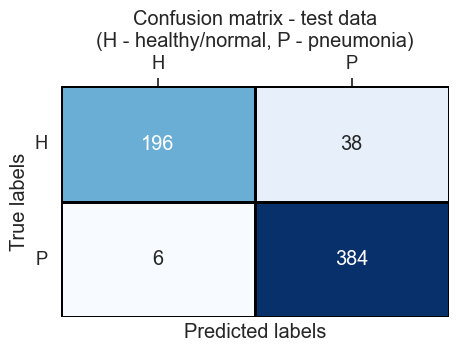

Classification report on test data
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       234
           1       0.91      0.98      0.95       390

    accuracy                           0.93       624
   macro avg       0.94      0.91      0.92       624
weighted avg       0.93      0.93      0.93       624



In [13]:
# calculate confusion matrix & classification report
conf_m = confusion_matrix(y_test, y_test_hat)
clas_r = classification_report(y_test, y_test_hat)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['H', 'P'], yticklabels=['H', 'P'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
ax.xaxis.set_ticks_position('top') 
plt.title('Confusion matrix - test data\n(H - healthy/normal, P - pneumonia)')
plt.show()

# print classification report
print('Classification report on test data')
print(clas_r)

## Interpretation:
- High Precision and Recall for Pneumonia Cases: The model is very good at identifying pneumonia cases, with a high recall of 98%, ensuring that most pneumonia cases are detected. The precision of 91% indicates that most of the predicted pneumonia cases are correct.
- Good Performance on Healthy/Normal Cases: The model also performs well on healthy/normal cases, with a precision of 97% and a recall of 84%. This indicates a slightly lower but still good detection rate for healthy cases compared to pneumonia cases.
- Balanced Performance: The high F1-scores and the overall accuracy of 93% suggest that the model is balanced and performs well across both classes.
### This classification report indicates that the model is reliable and effective at distinguishing between healthy and pneumonia cases in the test data.

In [14]:
y_val_hat = model.predict(X_val, batch_size=4)
y_val_hat = np.argmax(y_val_hat, axis=1)
y_val = np.argmax(y_val, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


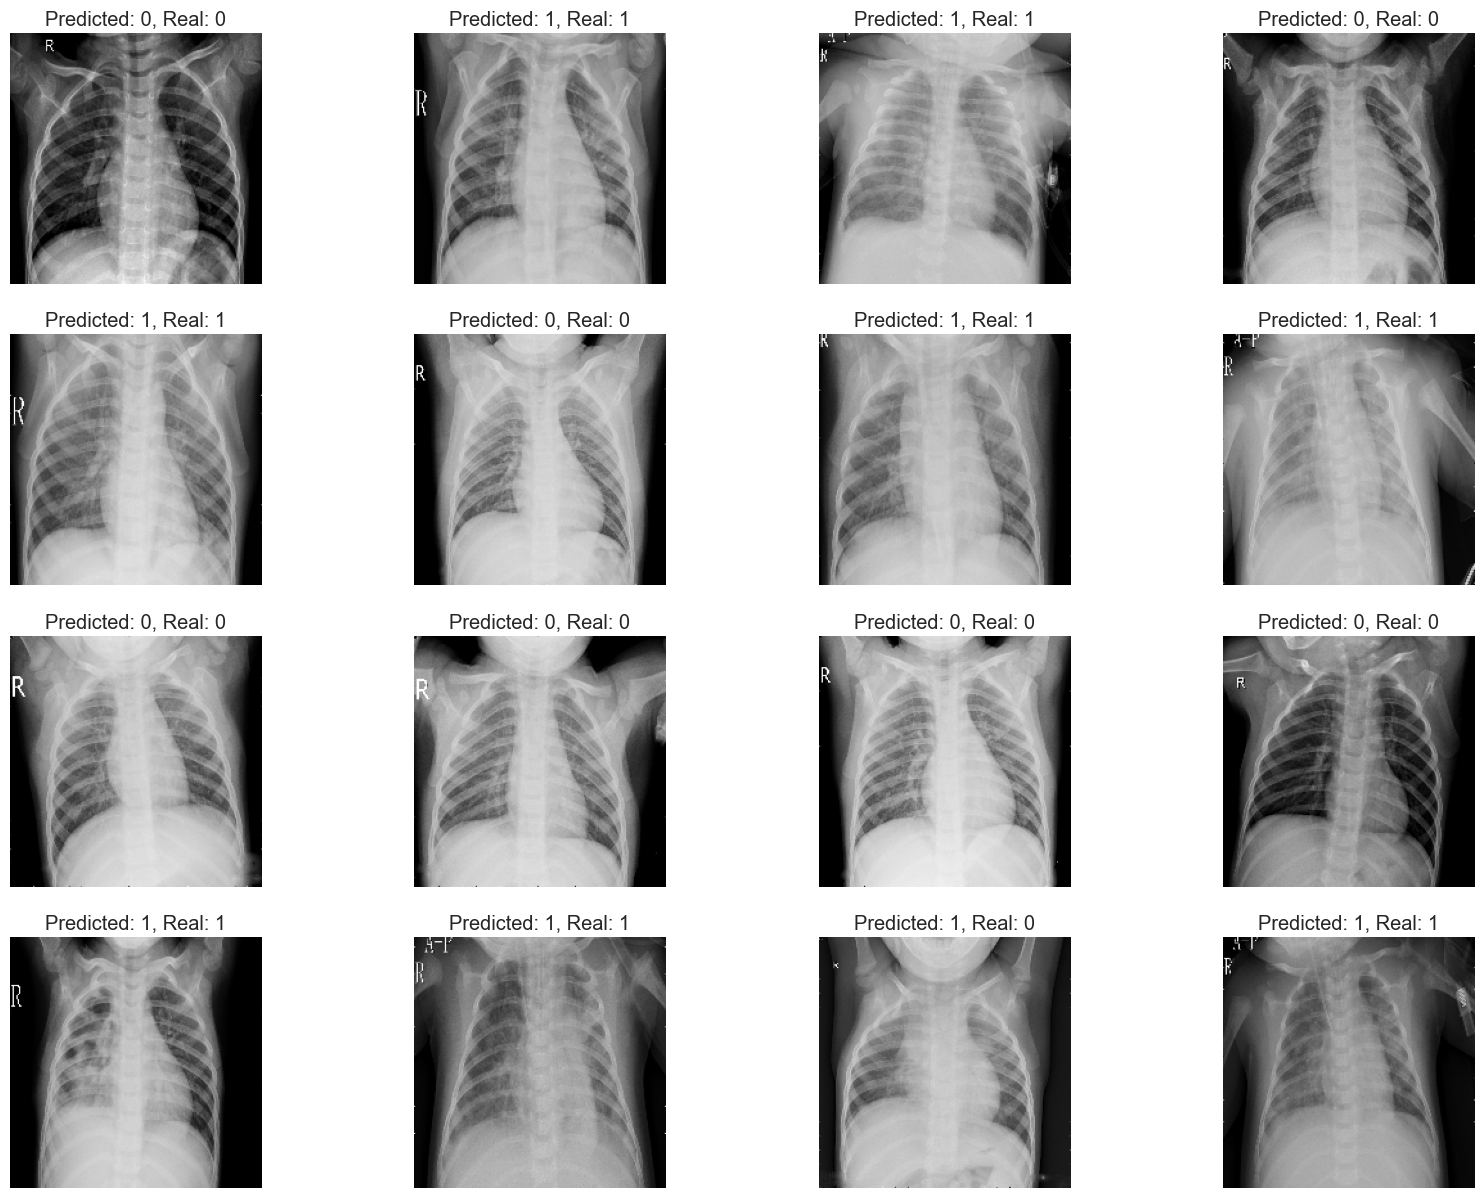

In [15]:
plt.figure(figsize=(20,15))
for i,x in enumerate(X_val):
    plt.subplot(4,4,i+1)
    plt.imshow(x.reshape(196, 196), cmap='gray')
    plt.axis('off')
    plt.title('Predicted: {}, Real: {}'.format(y_val_hat[i], y_val[i]))  